In [16]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [17]:
data = yf.download("GLD", start="2020-01-01", end="2023-12-31")
data = data[['Close']].rename(columns={"Close": "Price"})

/var/folders/9k/mf5dzn0x6rb5bssbk8nfjrxh0000gn/T/ipykernel_54582/2072805808.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("GLD", start="2020-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


In [18]:
data['SMA_20'] = data['Price'].rolling(window=20).mean()
data['SMA_50'] = data['Price'].rolling(window=50).mean()

In [19]:
data['Signal'] = 0
data.loc[data['SMA_20'] > data['SMA_50'], 'Signal'] = 1
data.loc[data['SMA_20'] < data['SMA_50'], 'Signal'] = -1
data['Position'] = data['Signal'].shift()

In [20]:
data['Returns'] = data['Price'].pct_change()
data['Strategy_Returns'] = data['Returns'] * data['Position']

In [21]:
cumulative_returns = (1 + data['Strategy_Returns'].fillna(0)).cumprod()
final_return = cumulative_returns.iloc[-1]
print("Hypothetical strategy return: {:.2f}%".format((final_return - 1) * 100))

Hypothetical strategy return: -18.93%


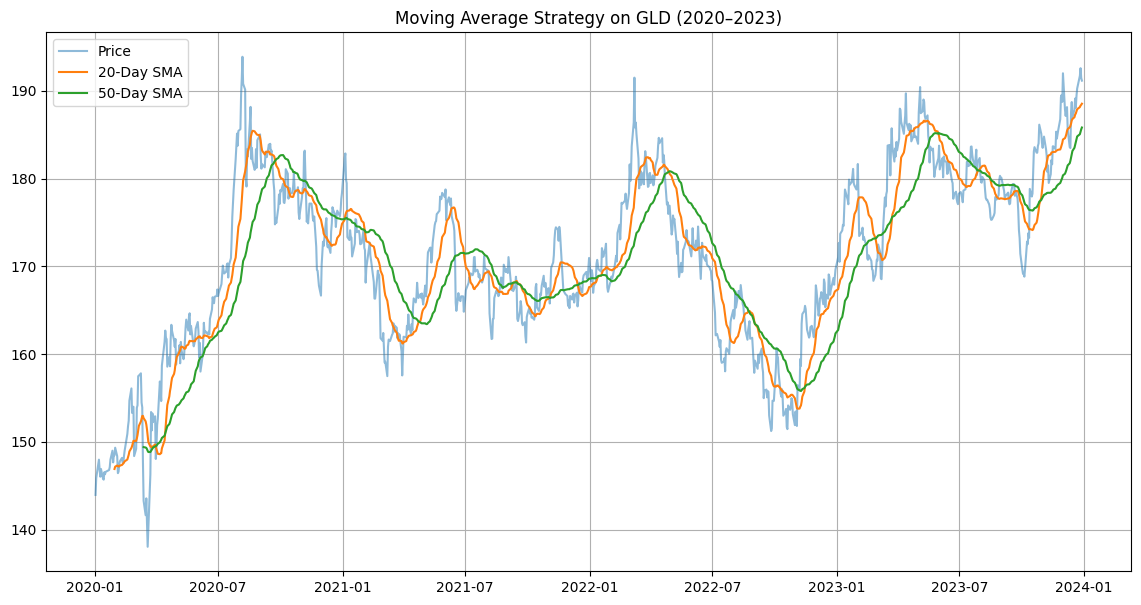

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(data['Price'], label='Price', alpha=0.5)
plt.plot(data['SMA_20'], label='20-Day SMA')
plt.plot(data['SMA_50'], label='50-Day SMA')
plt.title("Moving Average Strategy on GLD (2020–2023)")
plt.legend()
plt.grid(True)
plt.show()
